In [8]:
import os

In [9]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
import warnings
warnings.filterwarnings("ignore")

### load data

In [11]:
main_folder = r"C:\Users\Alexandre Boulenger\santransakt_main"
data_folder = os.path.join(main_folder, 'data')

In [12]:
train = pd.read_csv(os.path.join(data_folder,"train.csv"))
test = pd.read_csv(os.path.join(data_folder,"test.csv"))

### prep data

In [13]:
test['target'] = '_'#np.?
cols = test.columns[:-1].tolist()
cols = [cols[0], 'target']+cols[1:]
test = test.loc[:,cols]

In [14]:
traintest = pd.concat([train, test])
traintest.reset_index(drop=True, inplace=True)
traintest['set'] = 'test'
traintest.loc[train.index,'set'] = 'train'
traintest.set.value_counts()

test     200000
train    200000
Name: set, dtype: int64

In [31]:
train0 = train[ train['target']==0 ].copy()
train1 = train[ train['target']==1 ].copy()

### plot feature (conditional) distribution

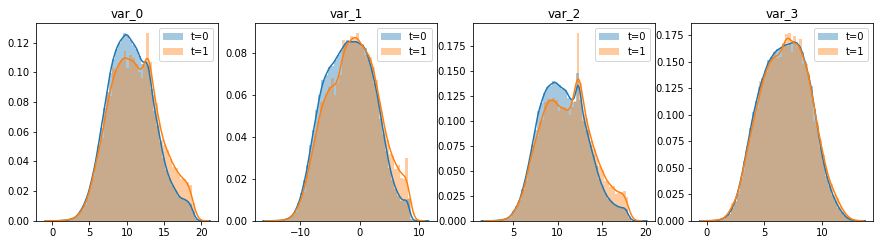

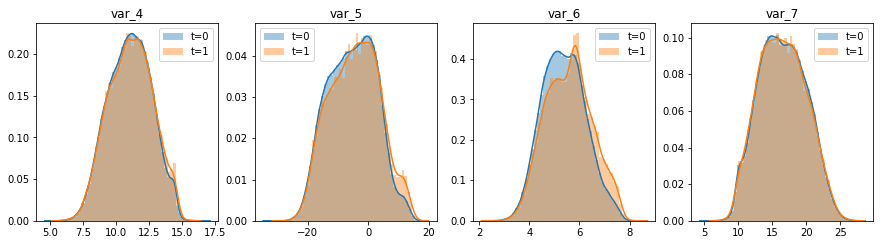

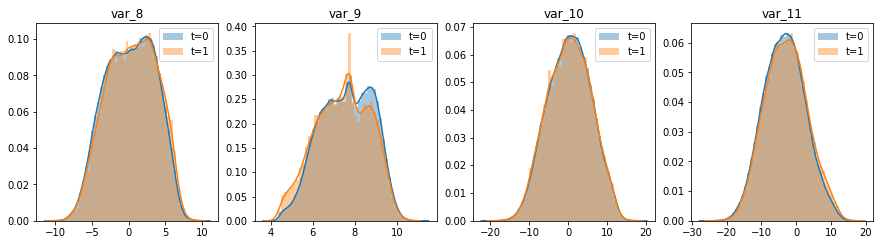

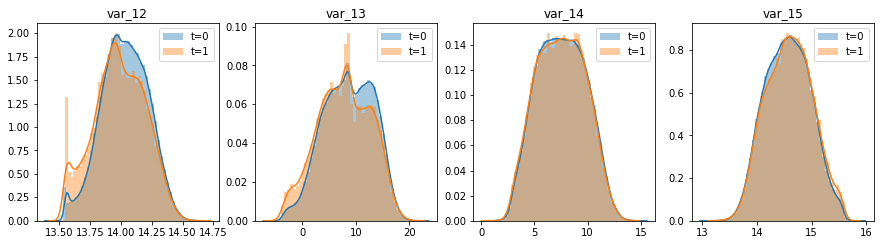

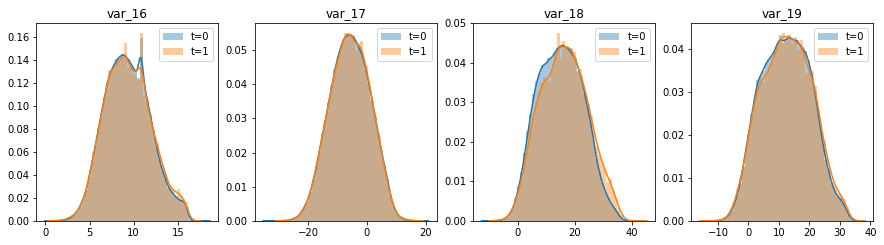

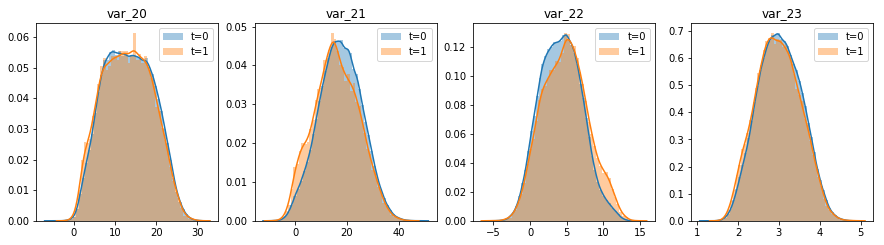

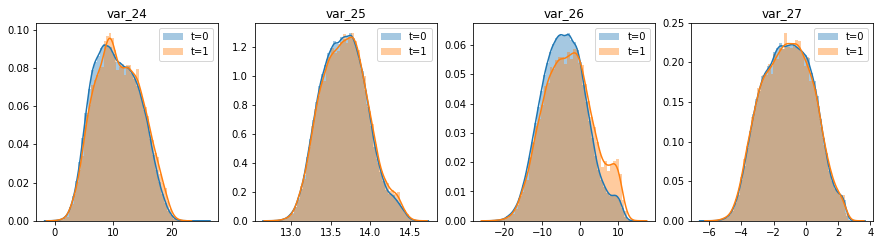

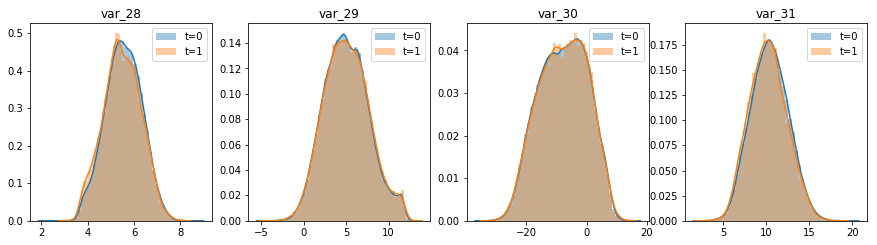

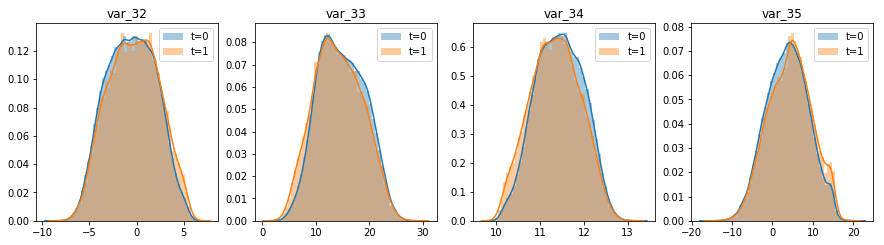

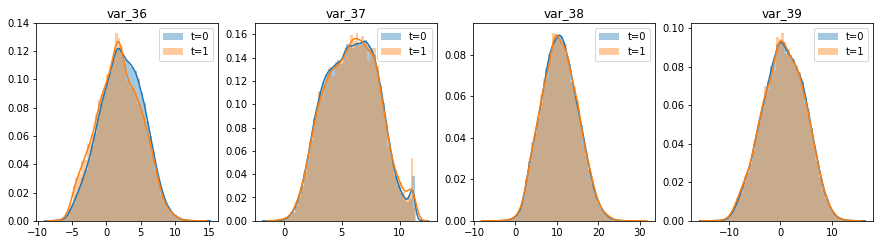

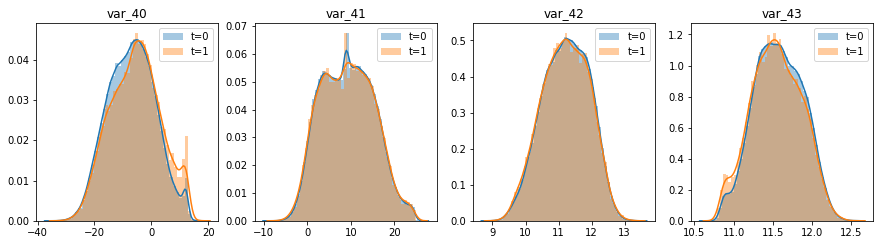

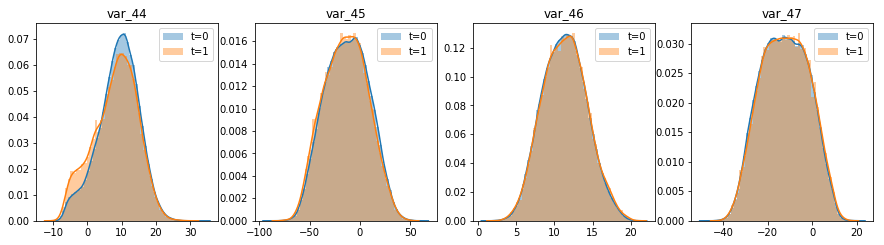

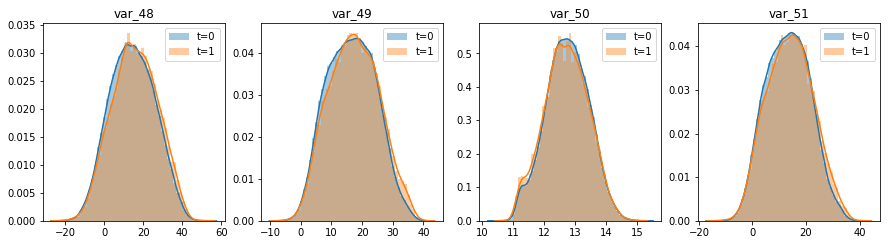

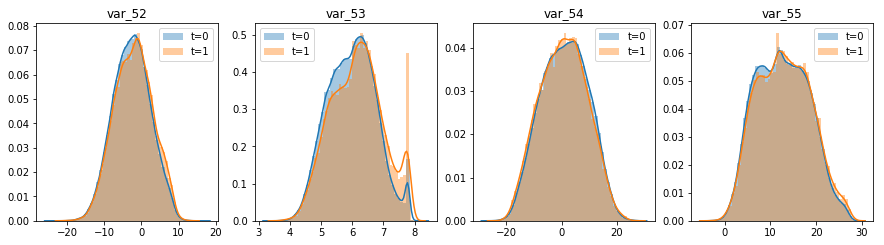

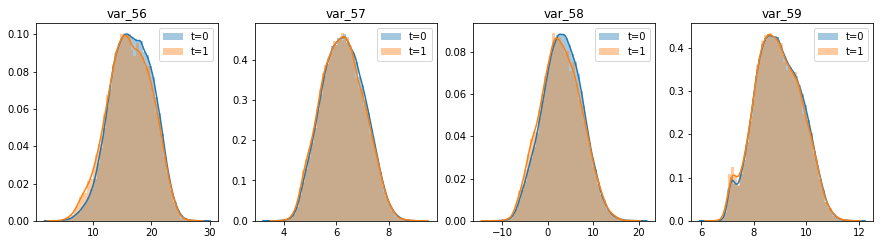

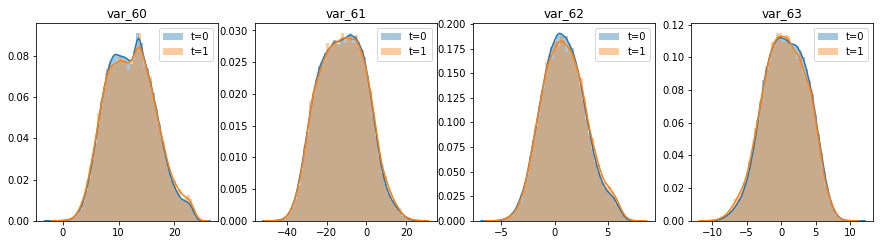

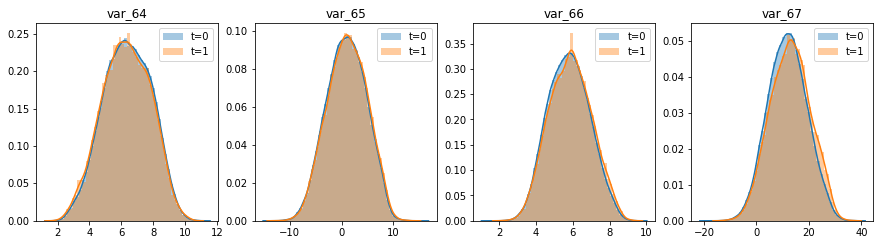

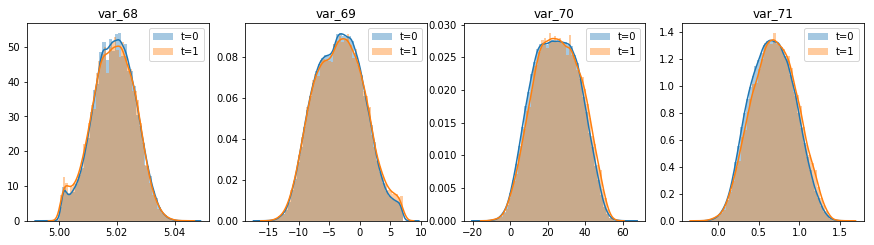

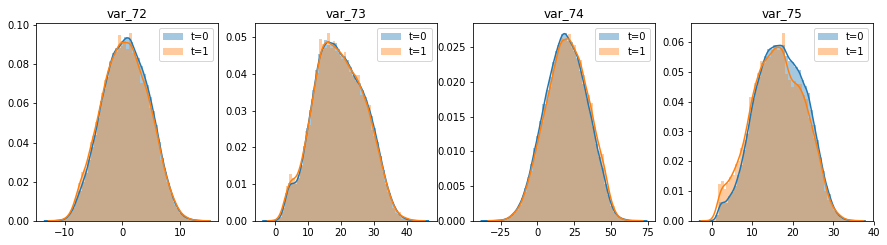

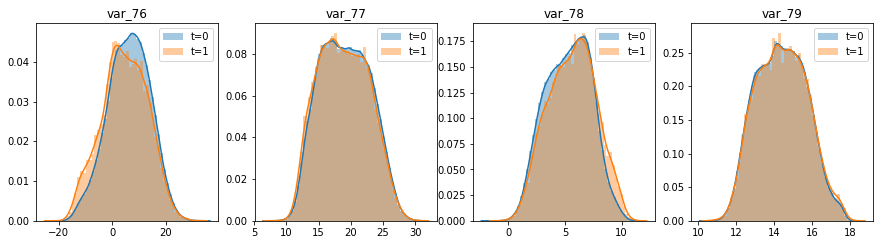

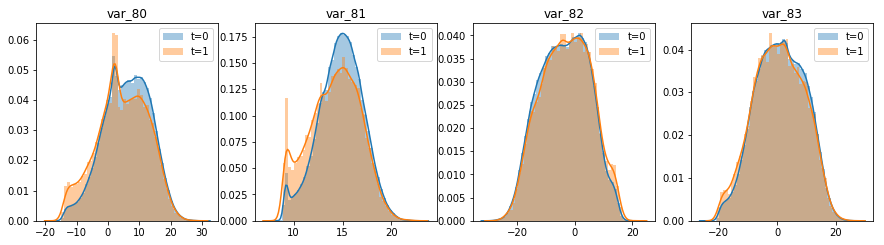

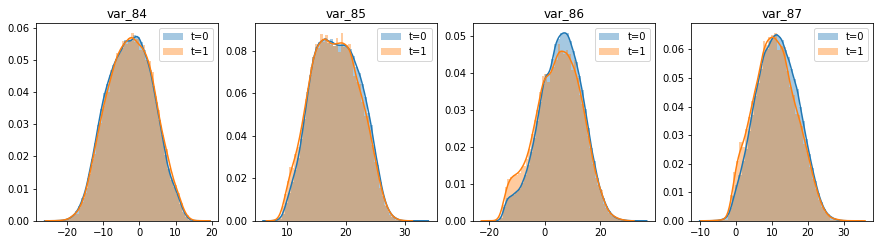

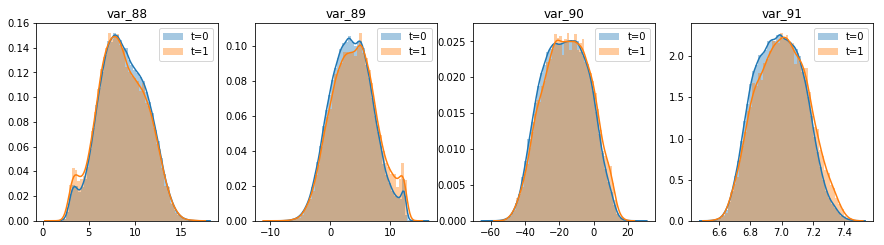

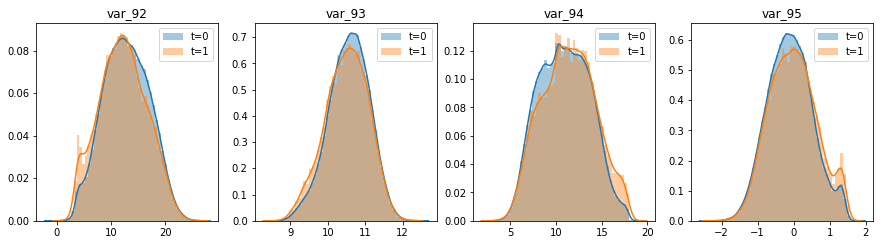

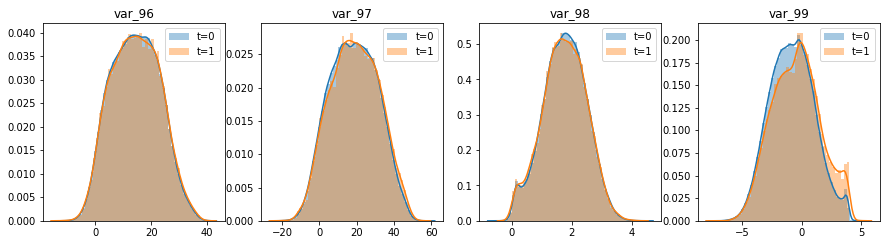

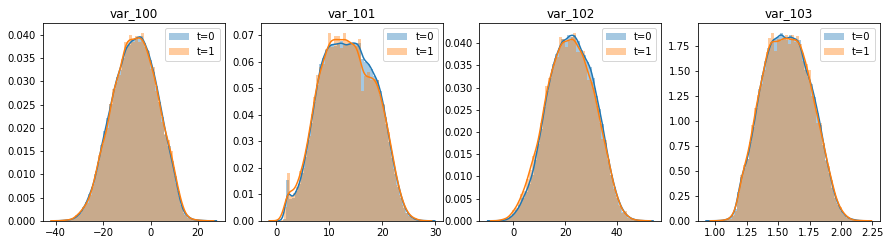

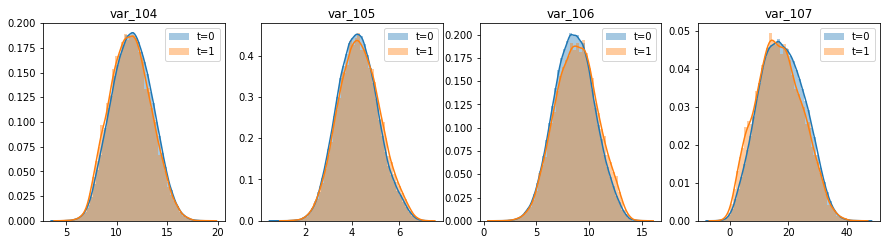

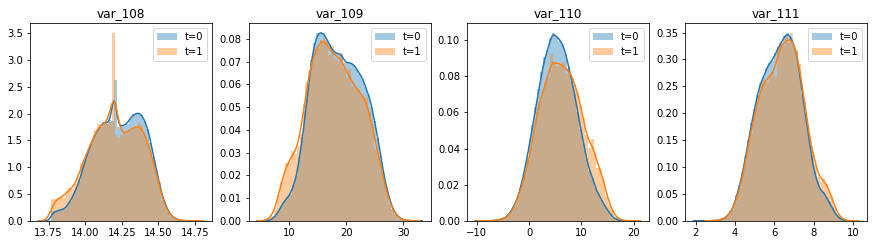

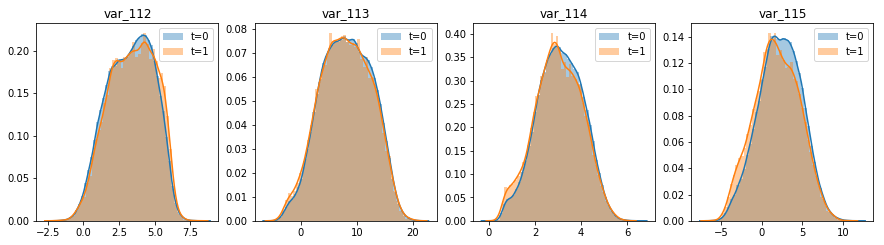

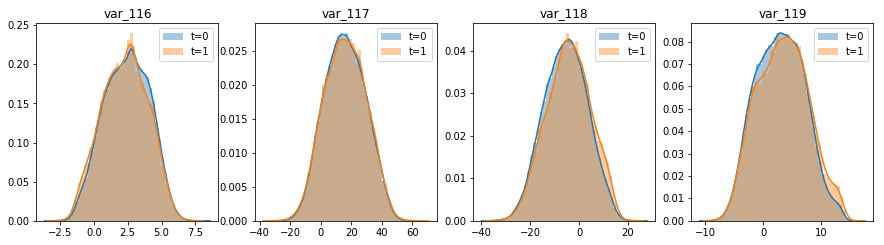

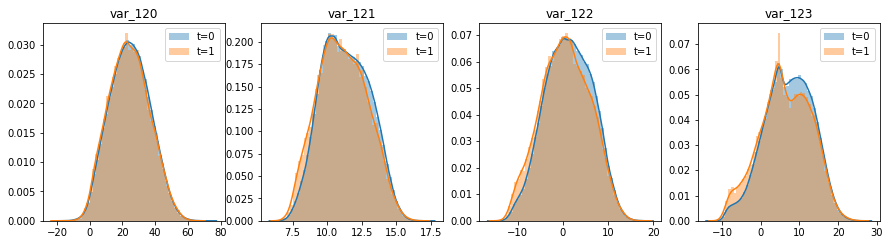

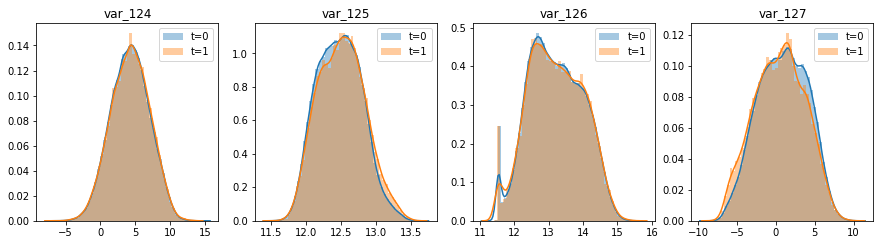

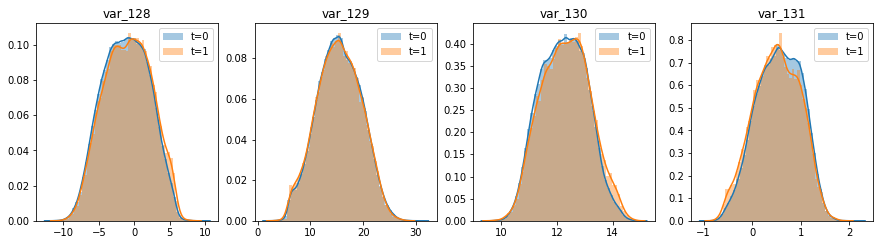

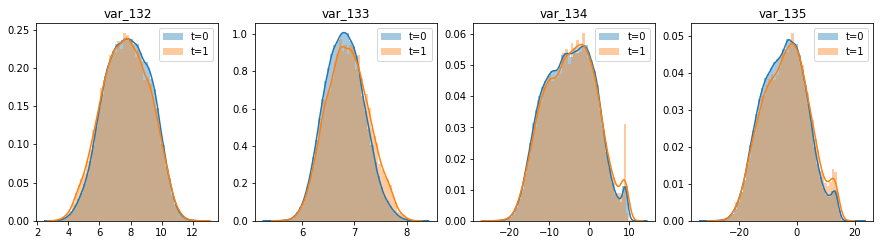

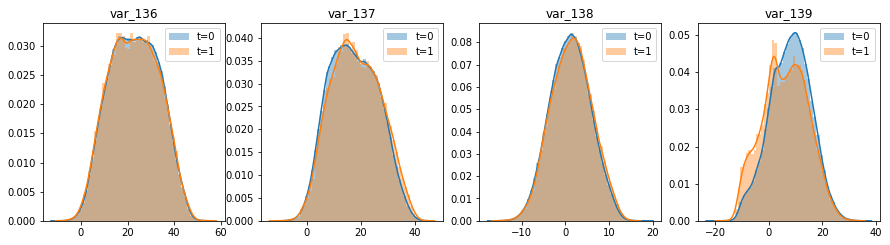

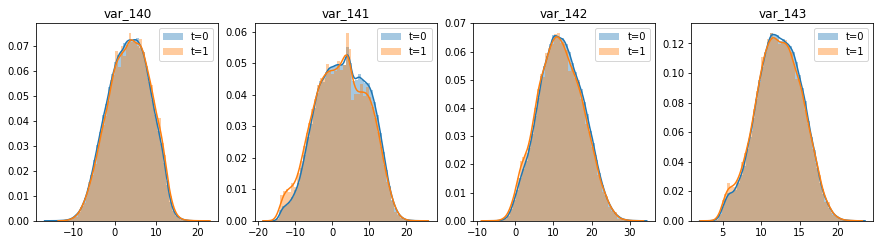

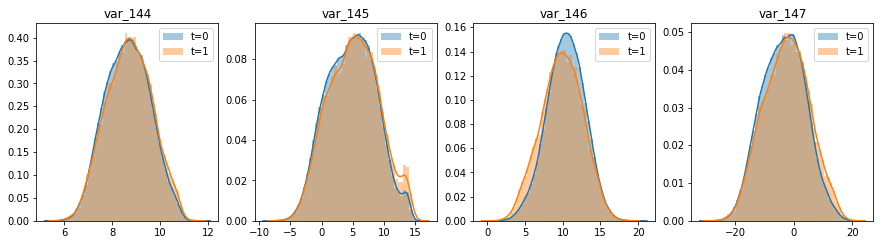

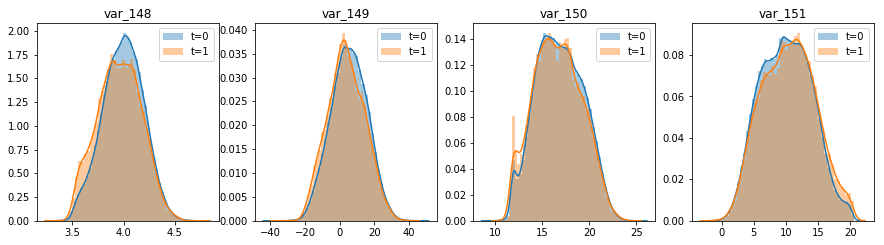

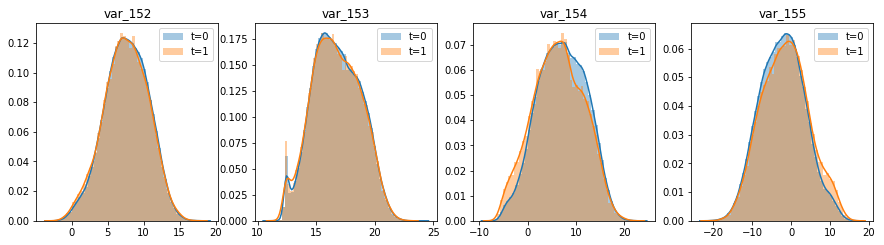

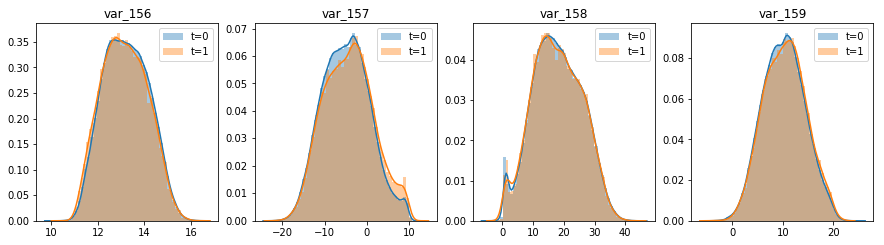

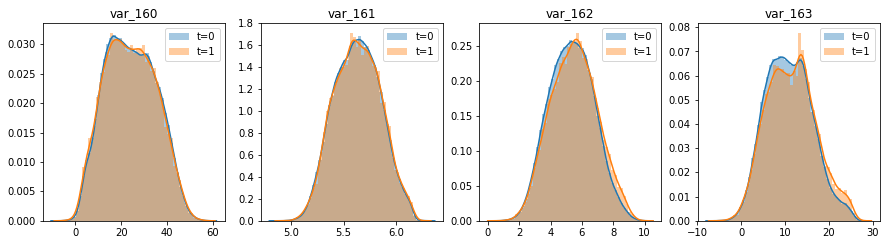

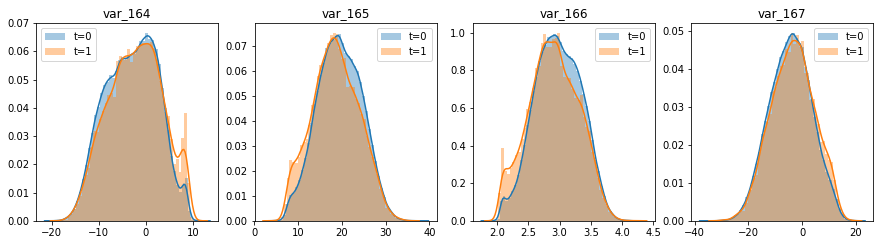

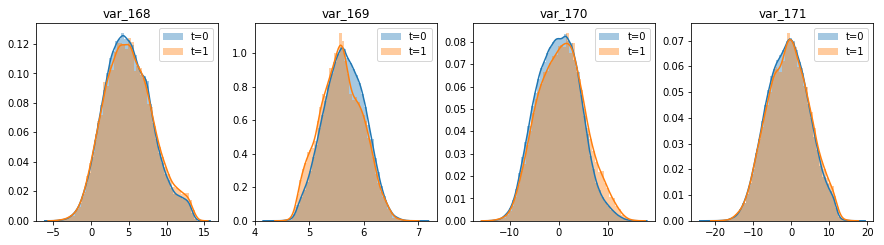

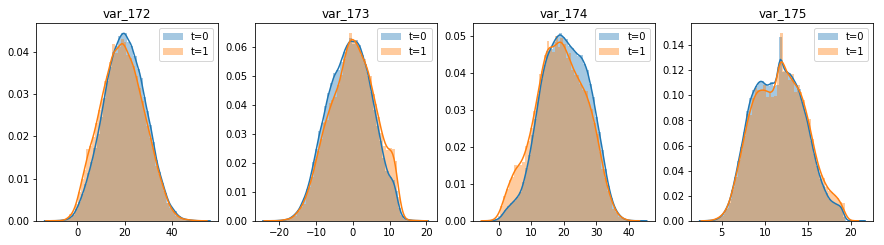

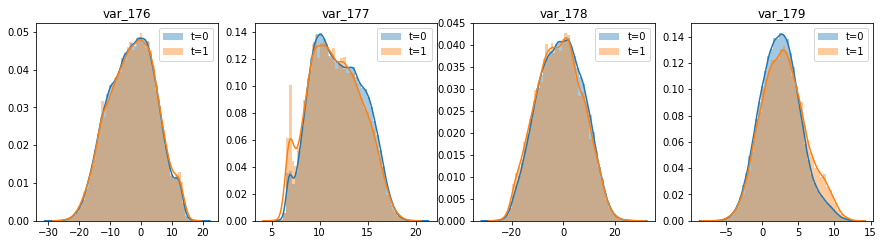

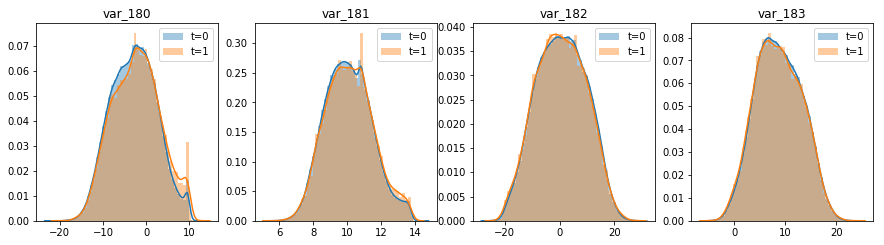

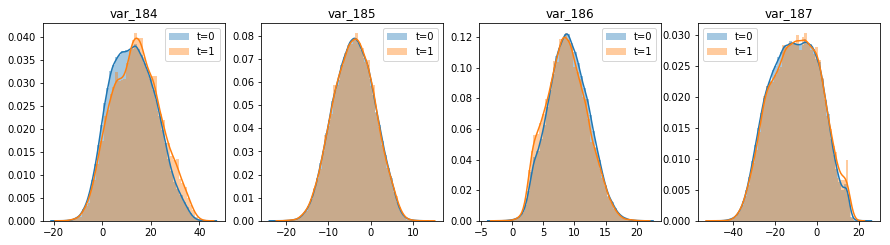

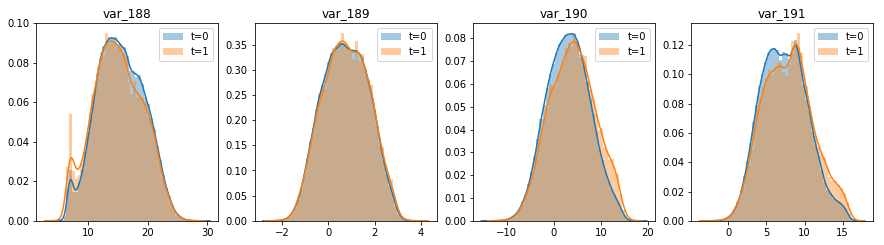

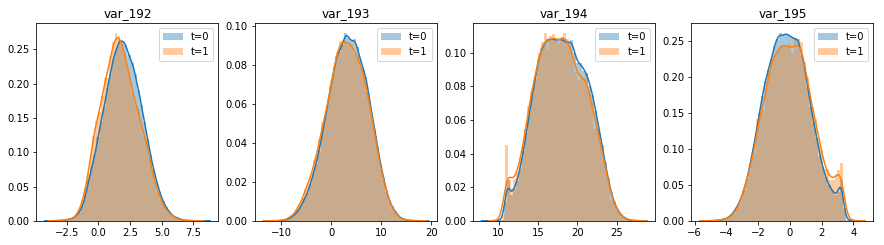

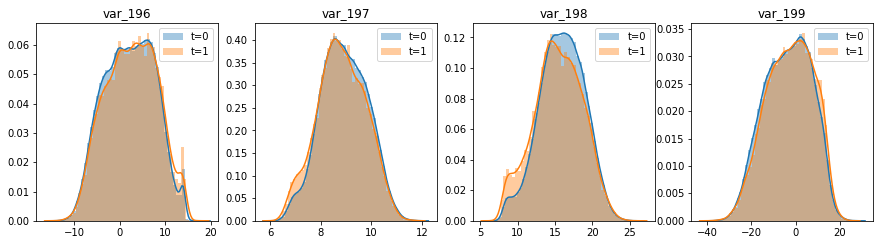

In [30]:
conditional = True
ct2 = 0
for j in range(50):
    plt.figure(figsize=(15,8))
    for v in range(4):
        ct = 0
        plt.subplot(2, 4, ct2%4+1)  
        if conditional:
            sns.distplot(train0['var_'+str(v+4*j)], label = 't=0')
            sns.distplot(train1['var_'+str(v+4*j)], label = 't=1')
            plt.legend()
        else:
            sns.distplot(train['var_'+str(v+4*j)])
        plt.title('var_'+str(v+4*j))
        plt.xlabel('')
        ct2 += 1
    plt.show()

### plot feature conditional distributions and target conditional proba

In [35]:
# CALCULATE MEANS AND STANDARD DEVIATIONS
s = [0]*200
m = [0]*200
for i in range(200):
    s[i] = np.std(train['var_'+str(i)])
    m[i] = np.mean(train['var_'+str(i)])
    
# CALCULATE PROB(TARGET=1 | X)
def getp(i,x):
    c = 3 #smoothing factor
    a = len( train1[ (train1['var_'+str(i)]>x-s[i]/c)&(train1['var_'+str(i)]<x+s[i]/c) ] ) 
    b = len( train0[ (train0['var_'+str(i)]>x-s[i]/c)&(train0['var_'+str(i)]<x+s[i]/c) ] )
    if a+b<500: return 0.1 #smoothing factor
    # RETURN PROBABILITY
    return a / (a+b)
    # ALTERNATIVELY RETURN ODDS
    # return a / b
    
# SMOOTH A DISCRETE FUNCTION
def smooth(x,st=1):
    for j in range(st):
        x2 = np.ones(len(x)) * 0.1
        for i in range(len(x)-2):
            x2[i+1] = 0.25*x[i]+0.5*x[i+1]+0.25*x[i+2]
        x = x2.copy()
    return x

Showing vars 0 to 7 ...


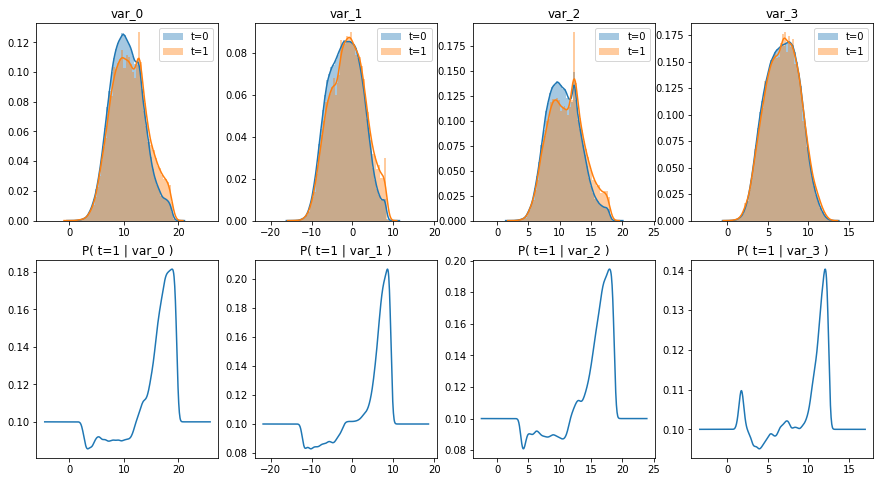

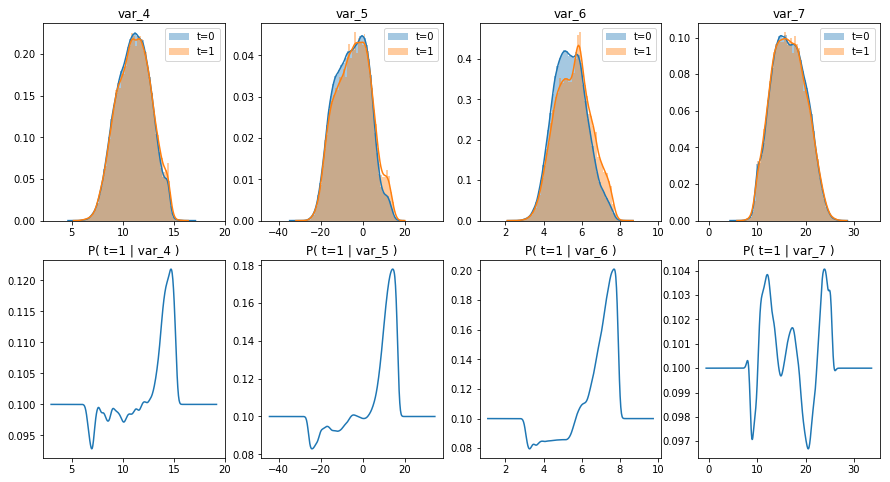

Showing vars 8 to 15 ...


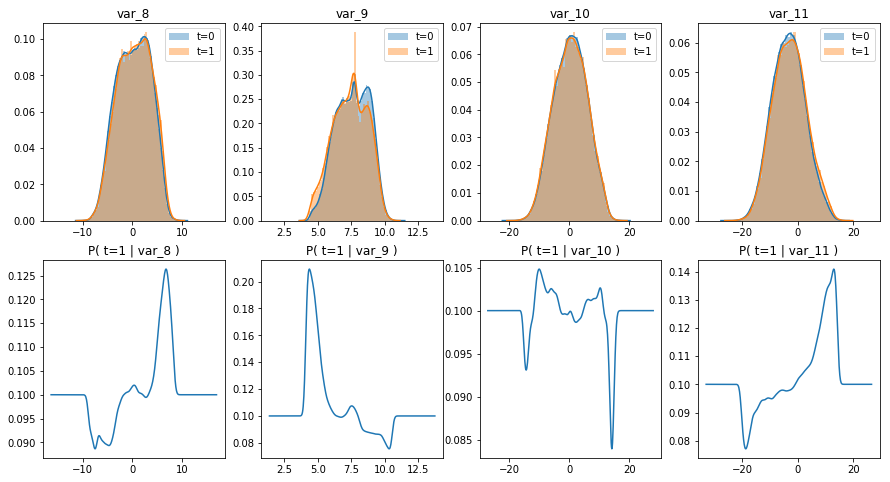

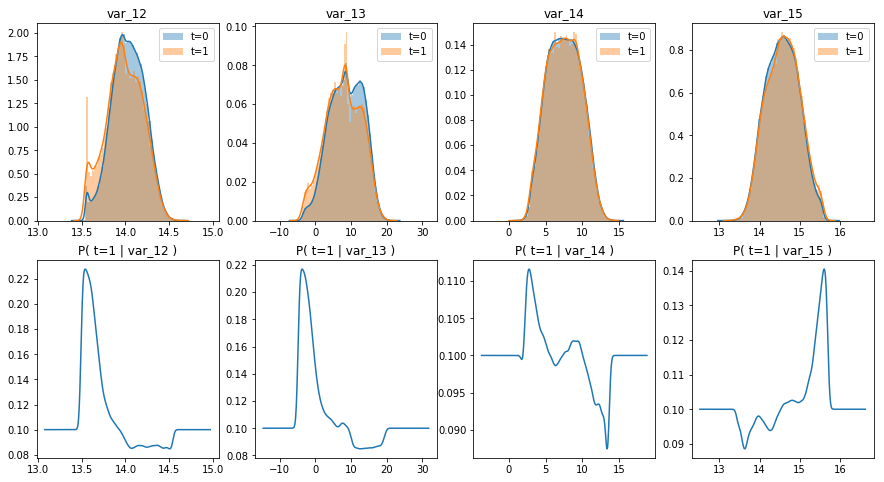

Showing vars 16 to 23 ...


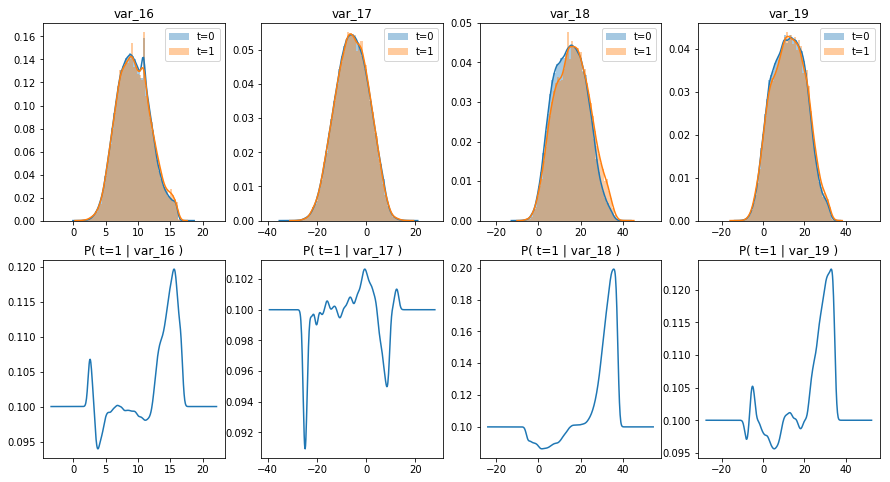

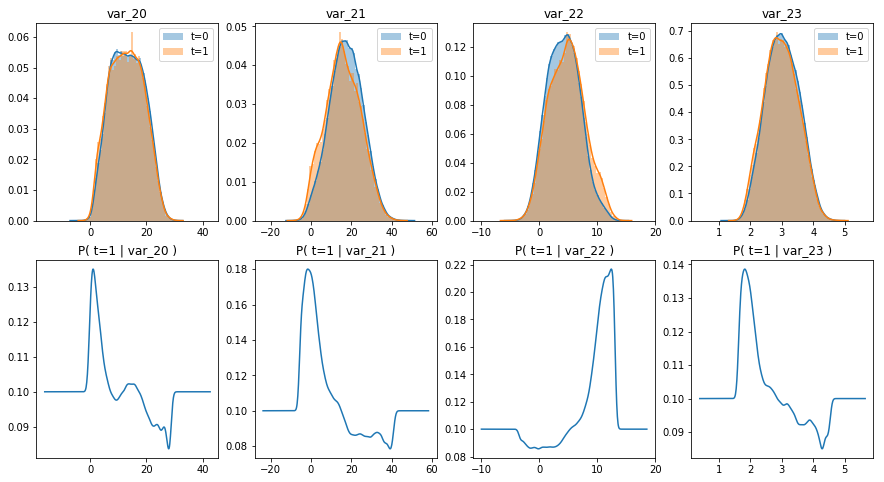

Showing vars 24 to 31 ...


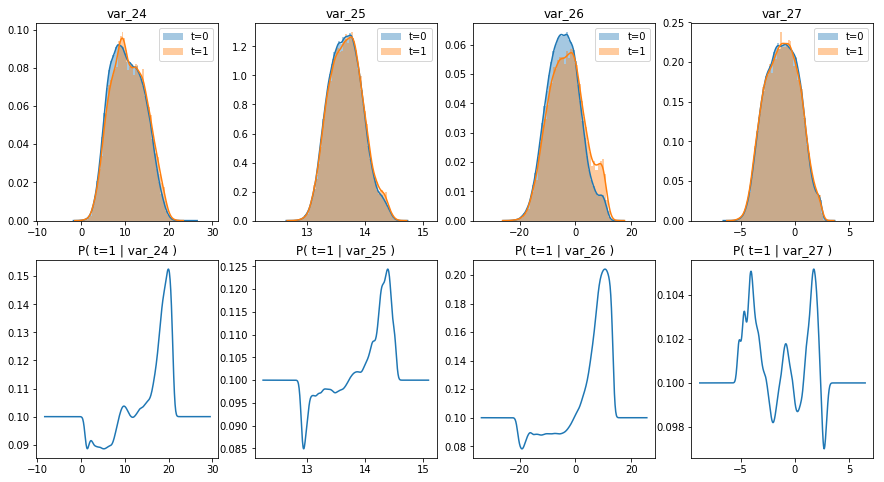

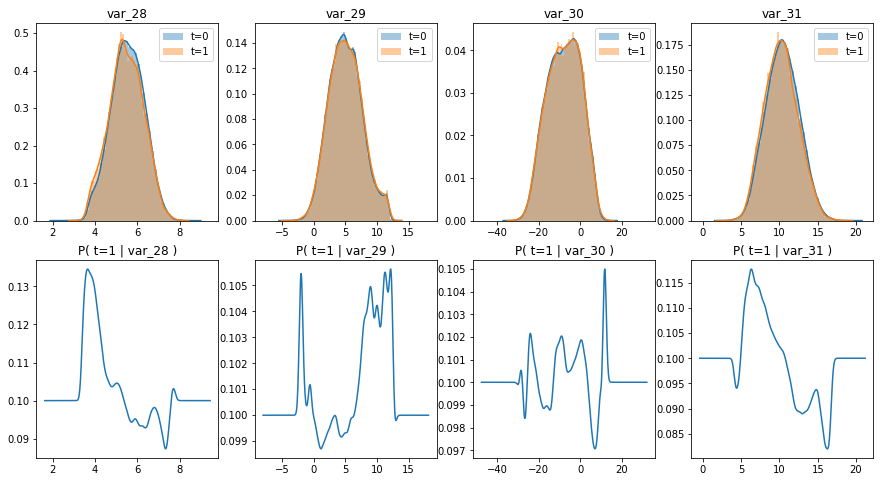

Showing vars 32 to 39 ...


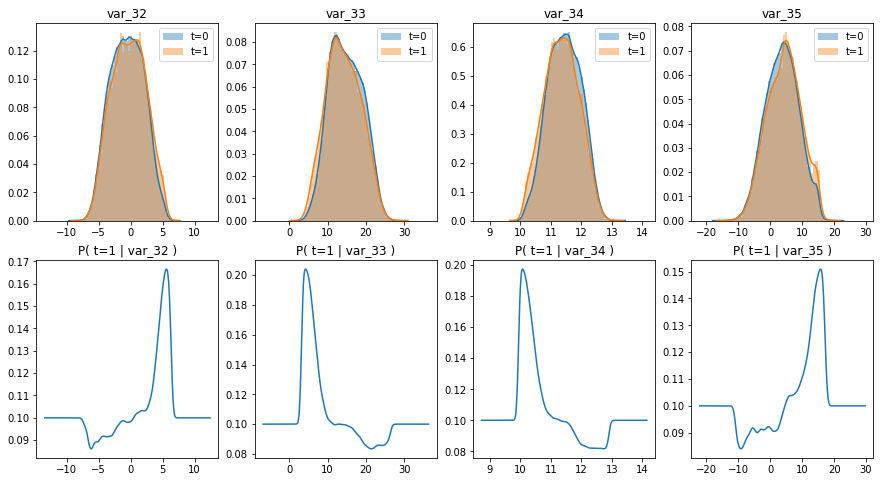

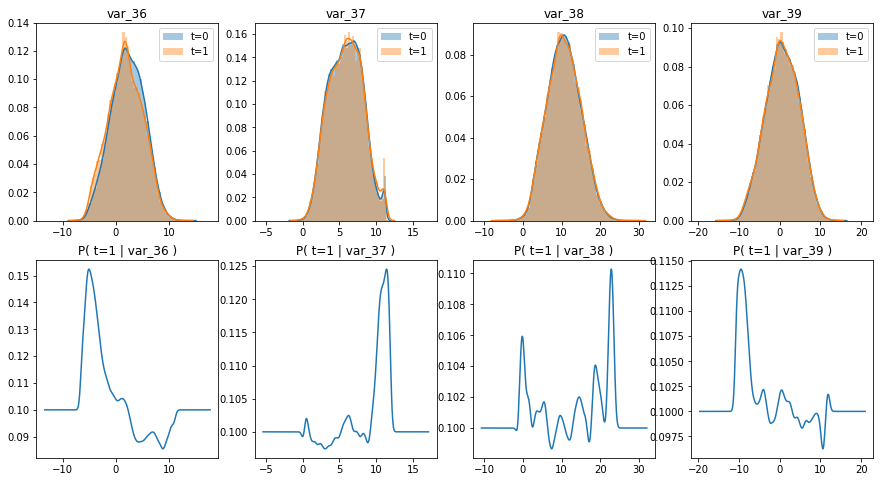

Showing vars 40 to 47 ...


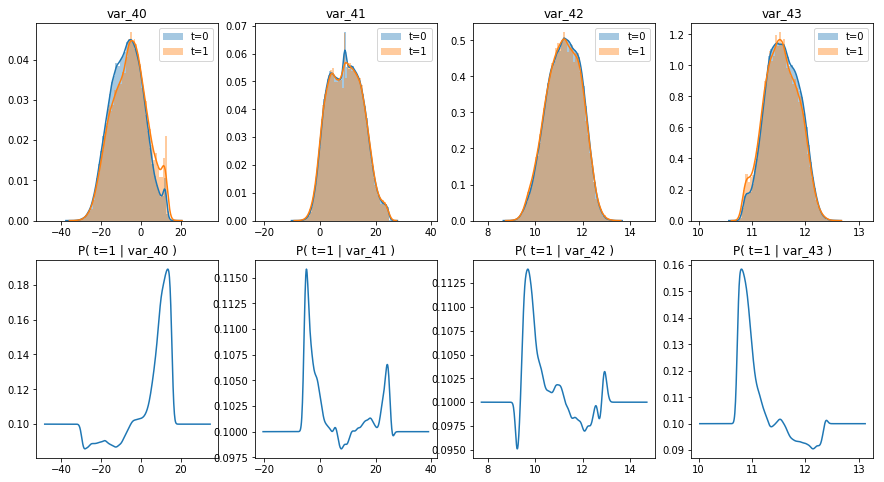

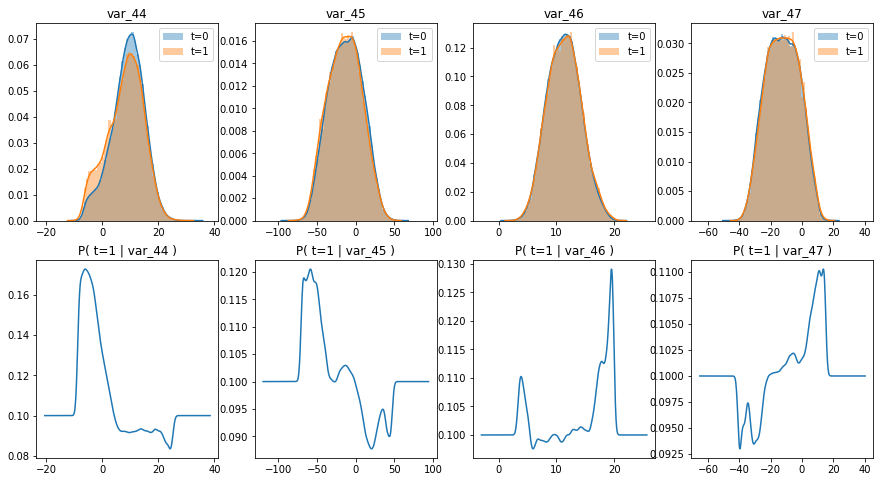

Showing vars 48 to 55 ...


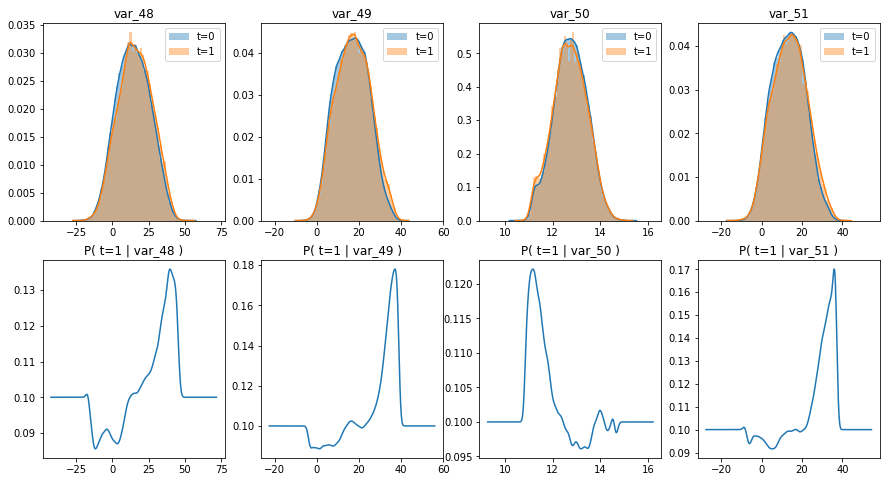

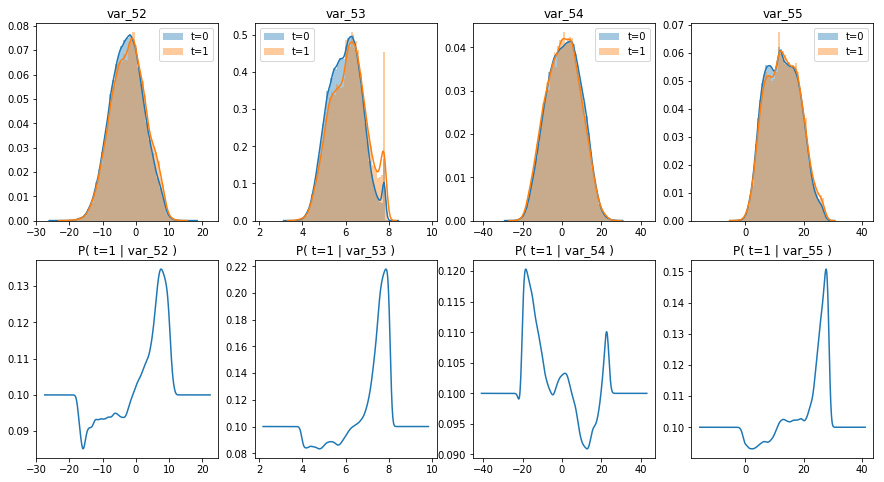

Showing vars 56 to 63 ...


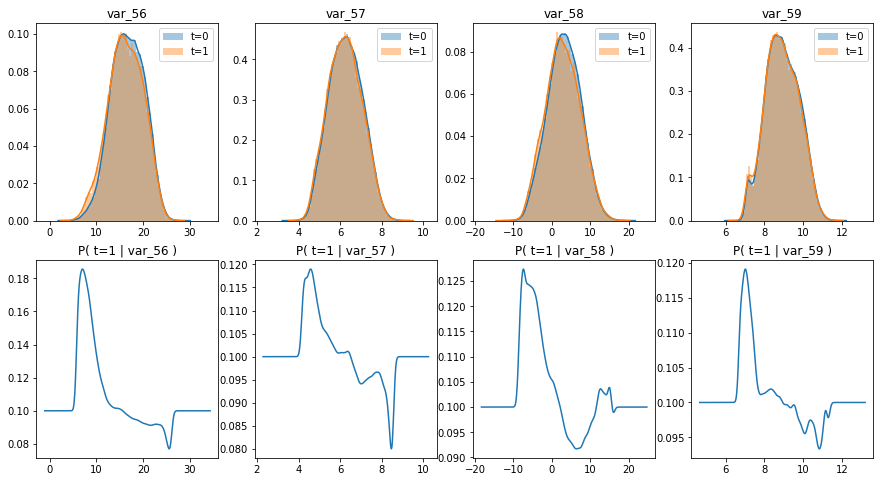

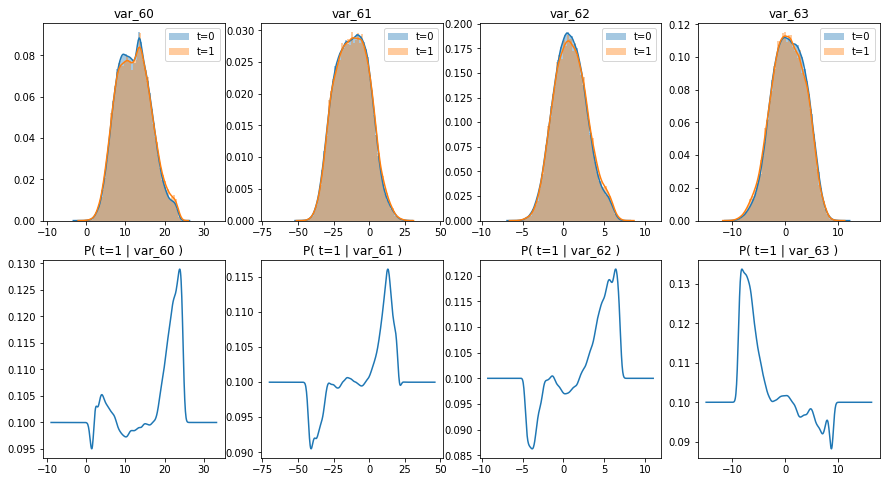

Showing vars 64 to 71 ...


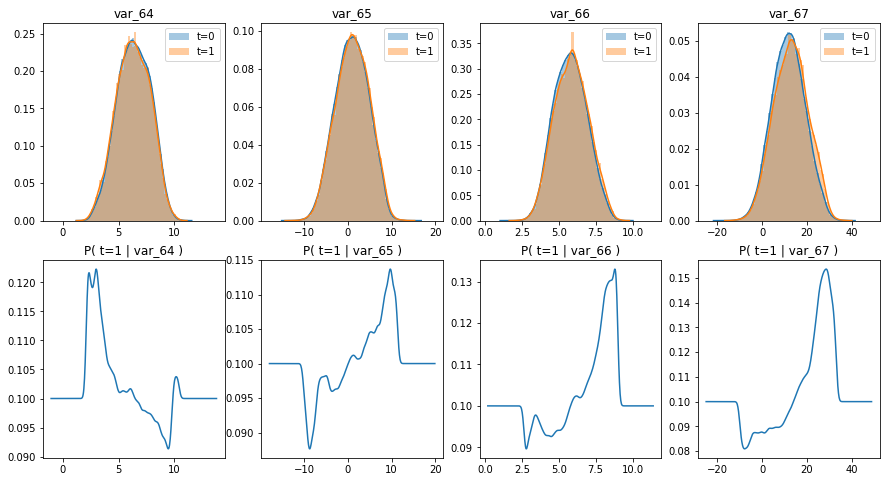

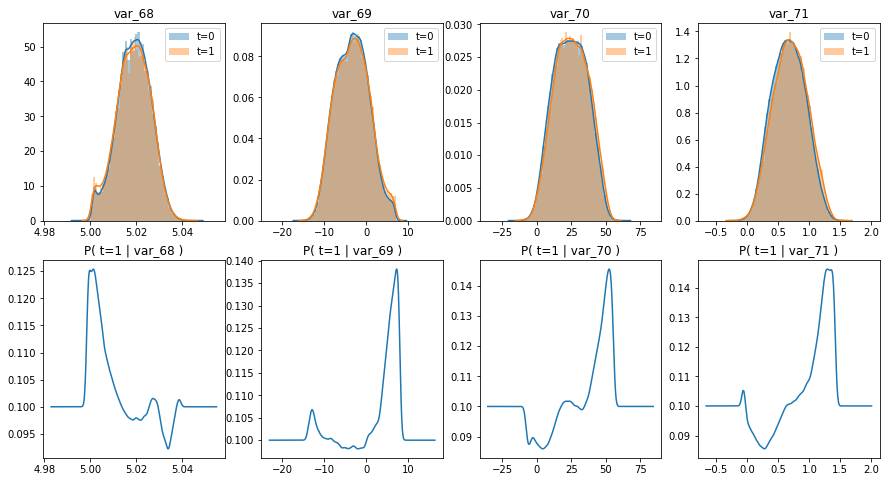

Showing vars 72 to 79 ...


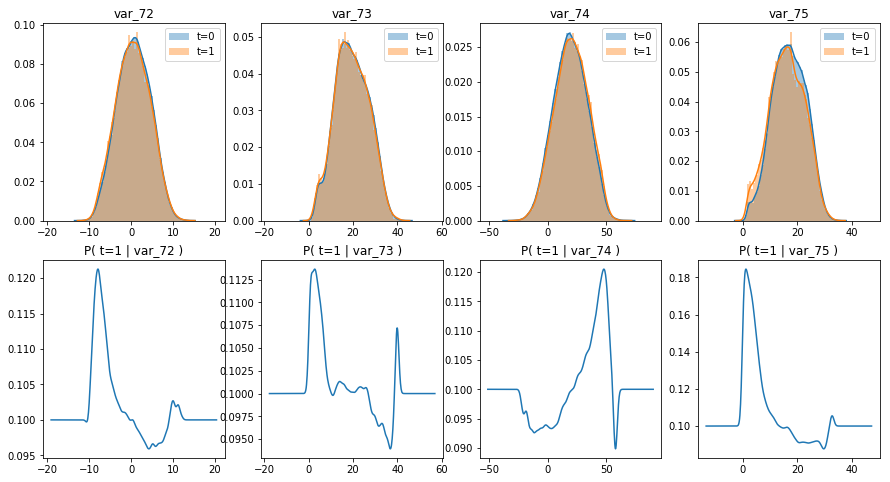

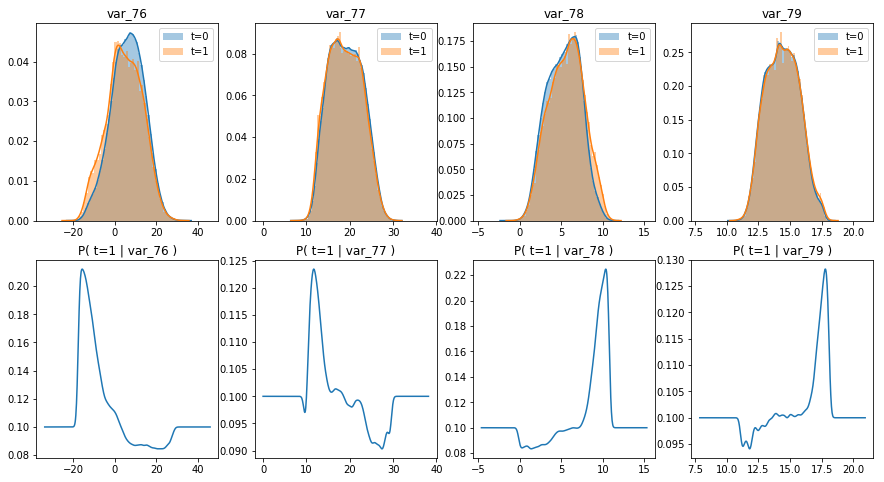

Showing vars 80 to 87 ...


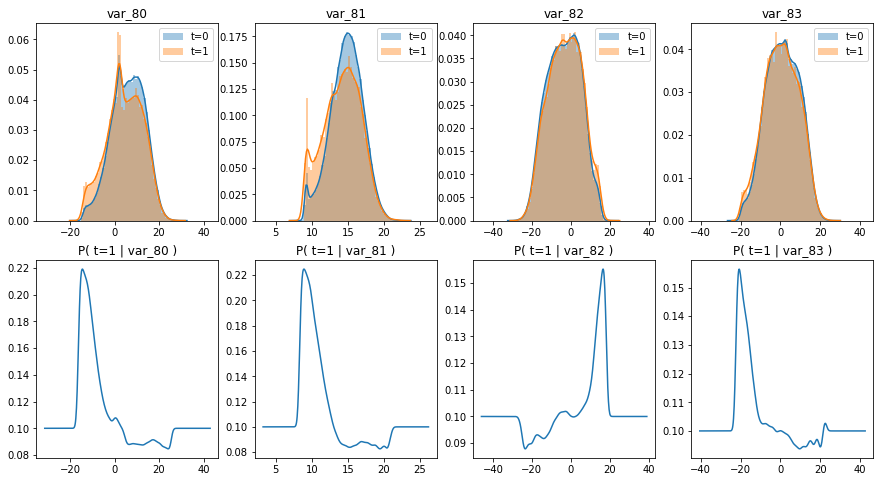

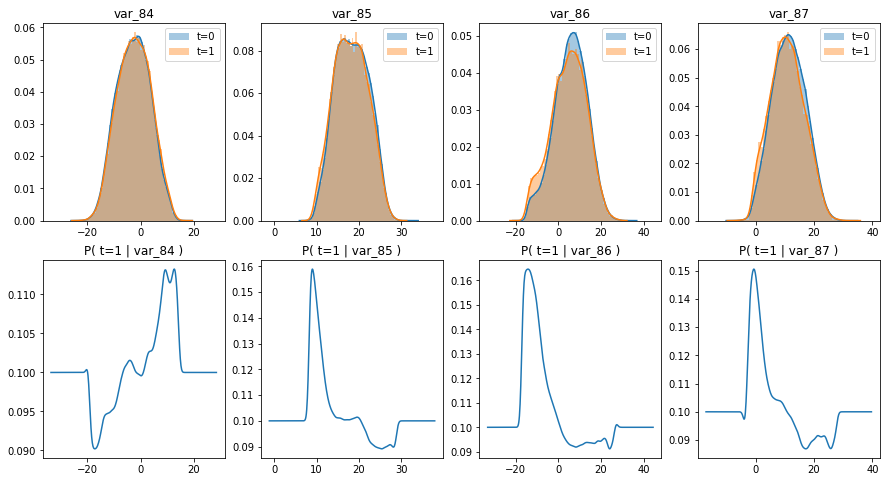

Showing vars 88 to 95 ...


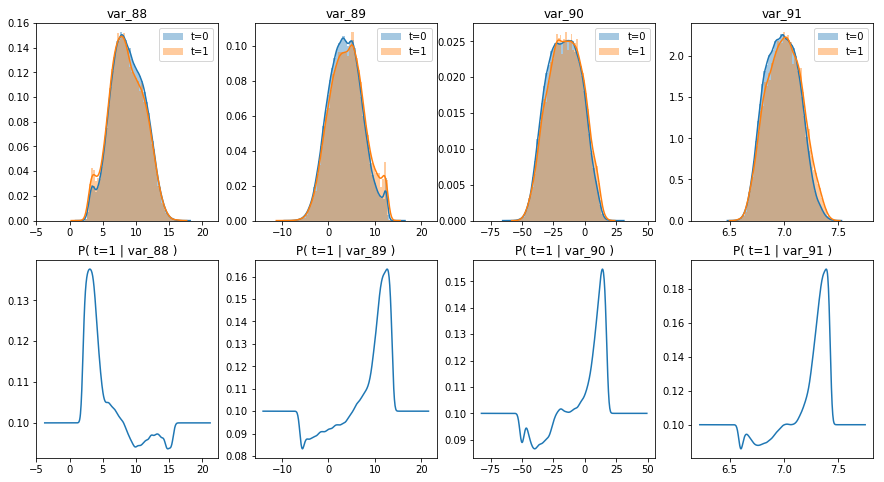

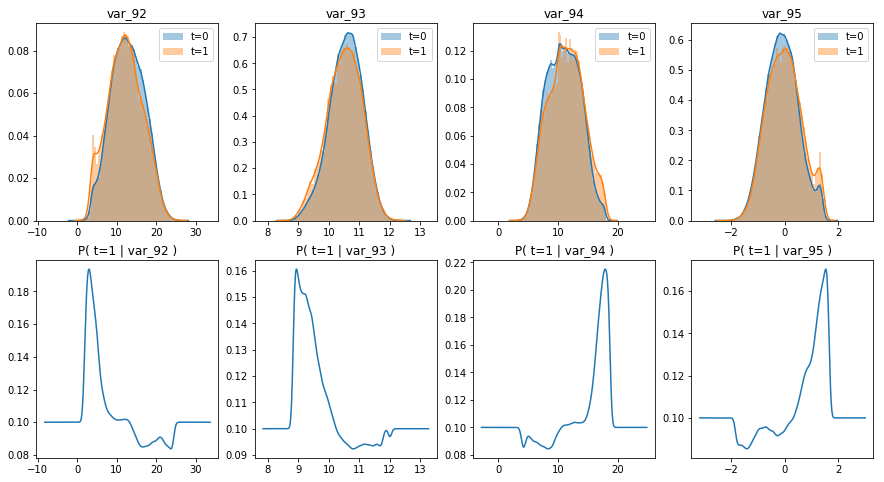

Showing vars 96 to 103 ...


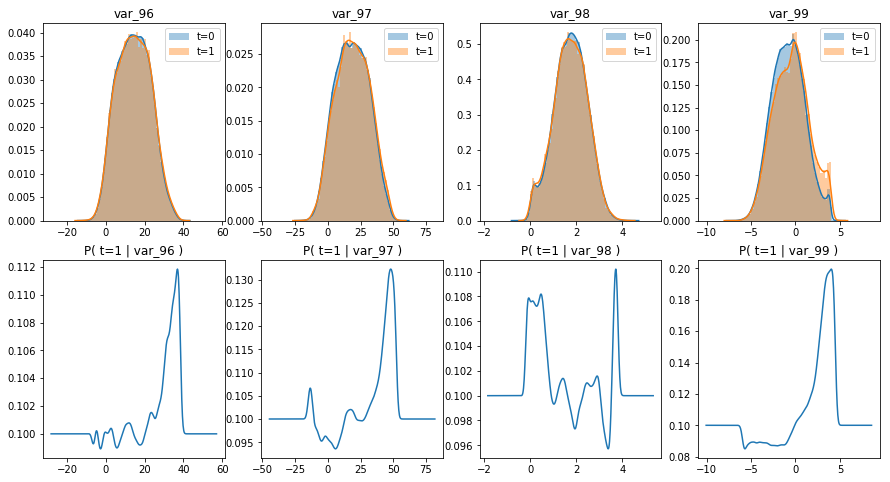

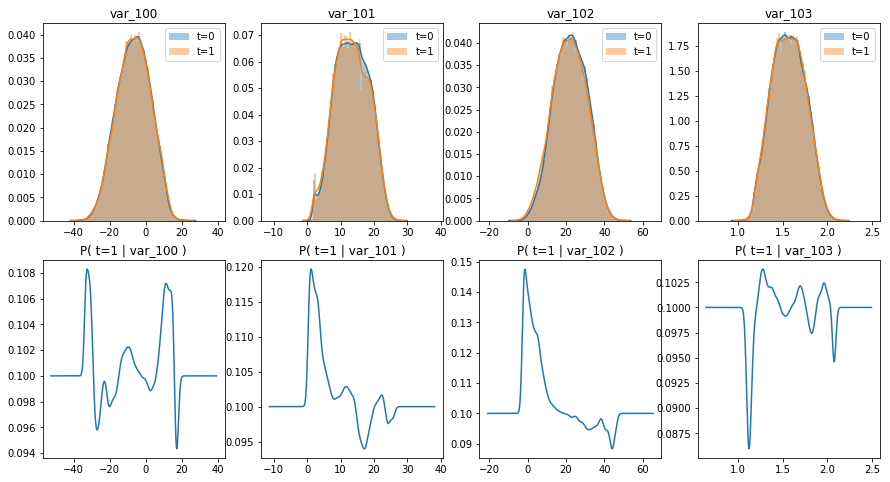

Showing vars 104 to 111 ...


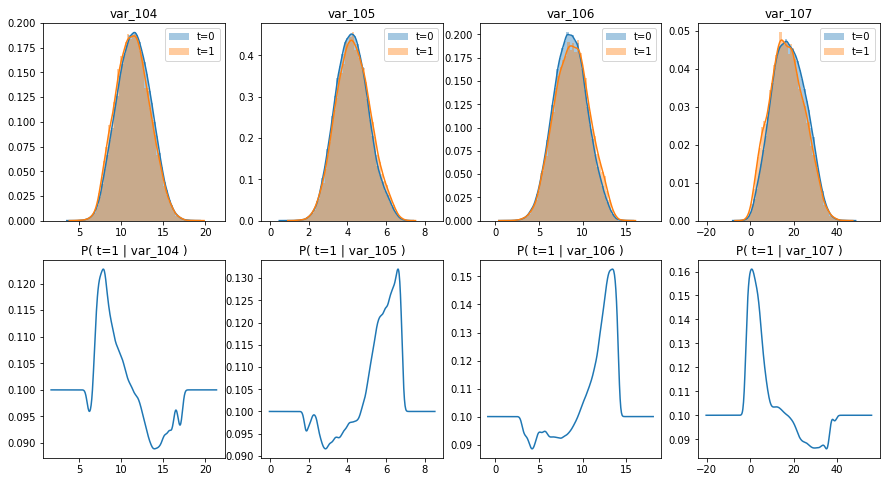

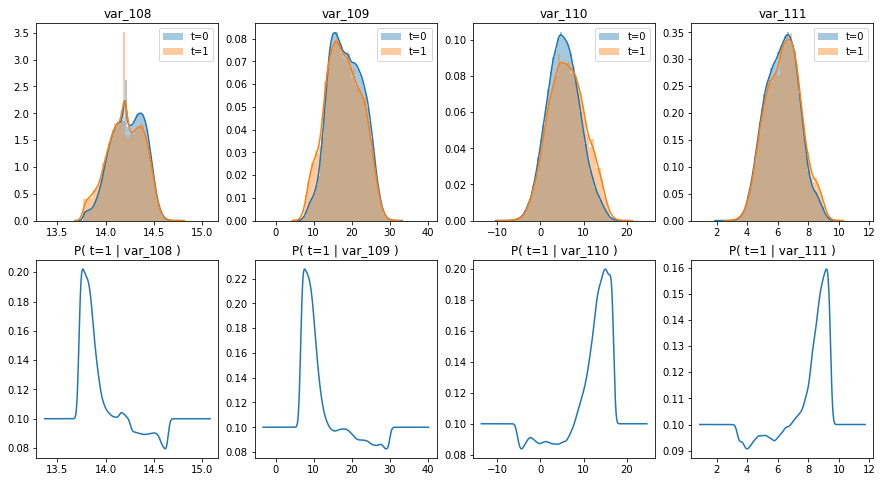

Showing vars 112 to 119 ...


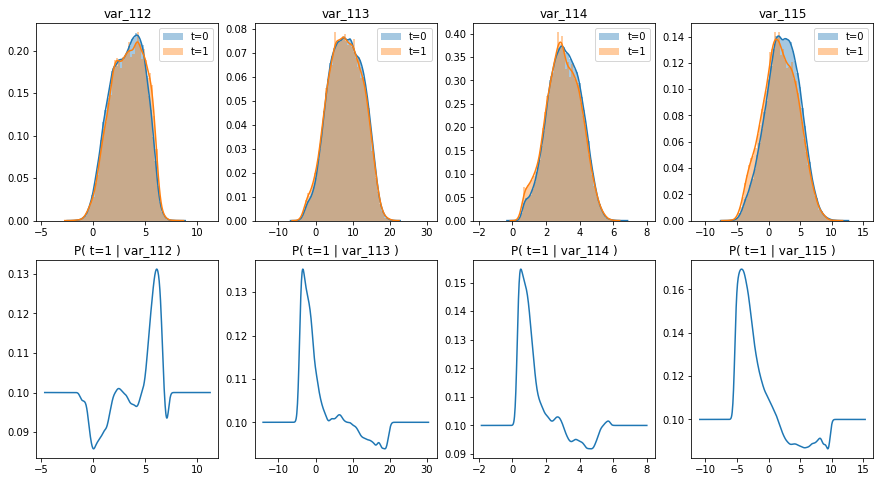

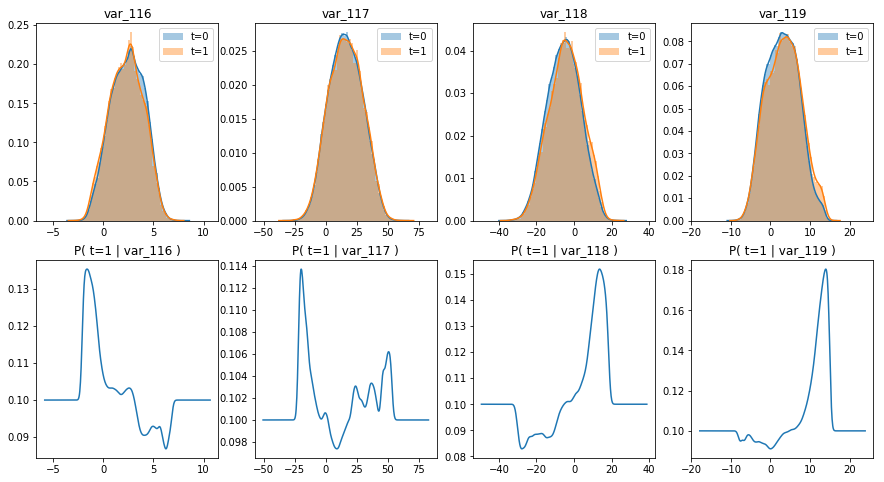

Showing vars 120 to 127 ...


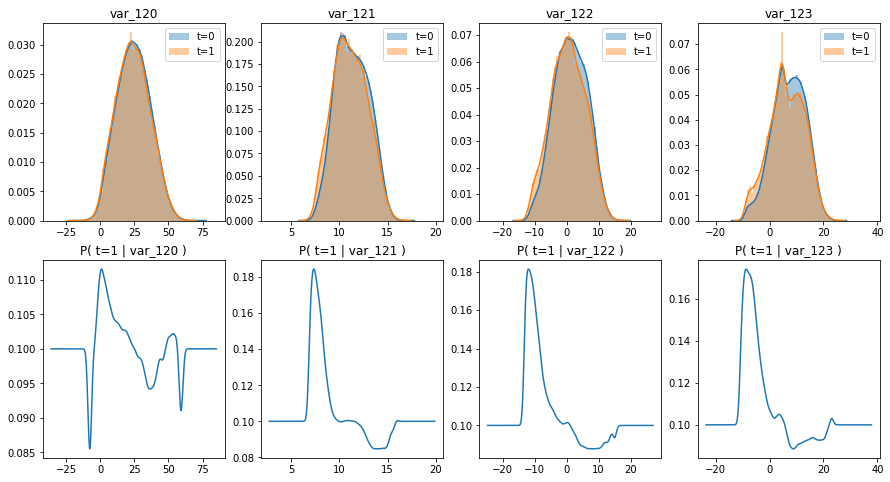

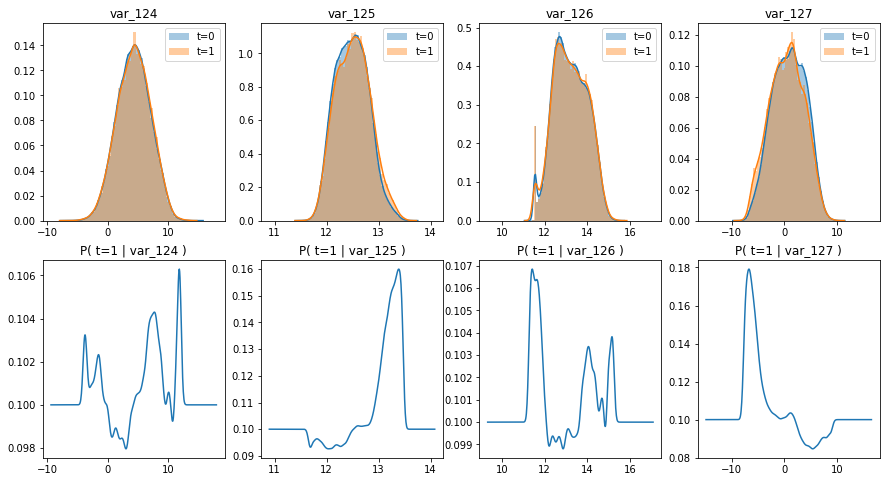

Showing vars 128 to 135 ...


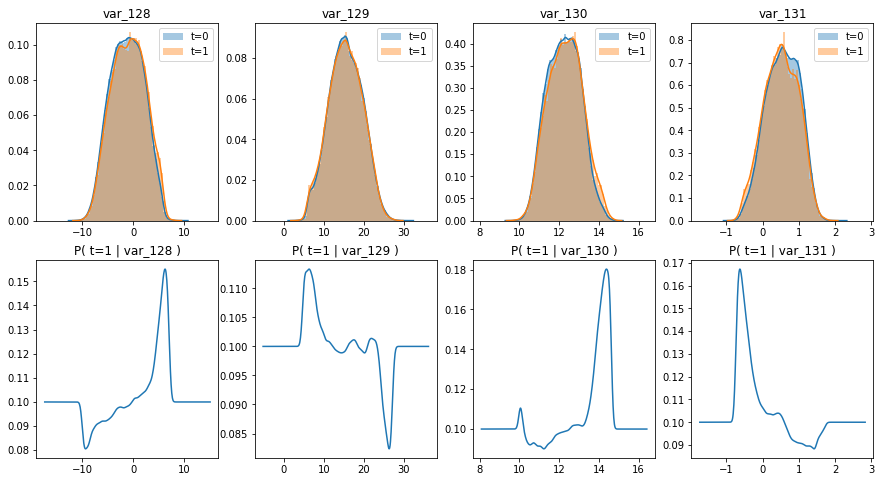

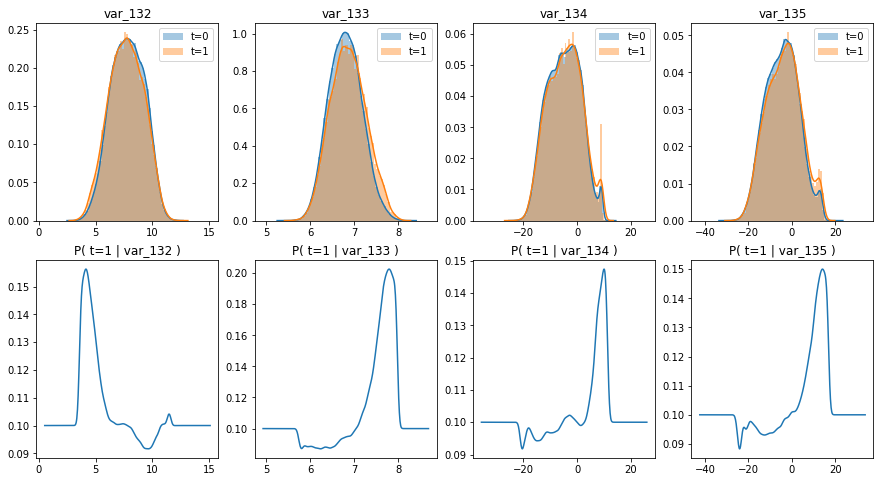

Showing vars 136 to 143 ...


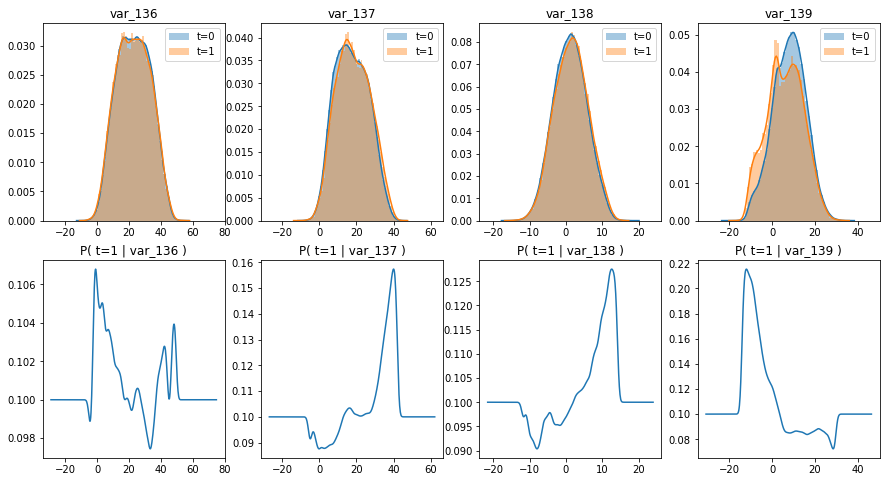

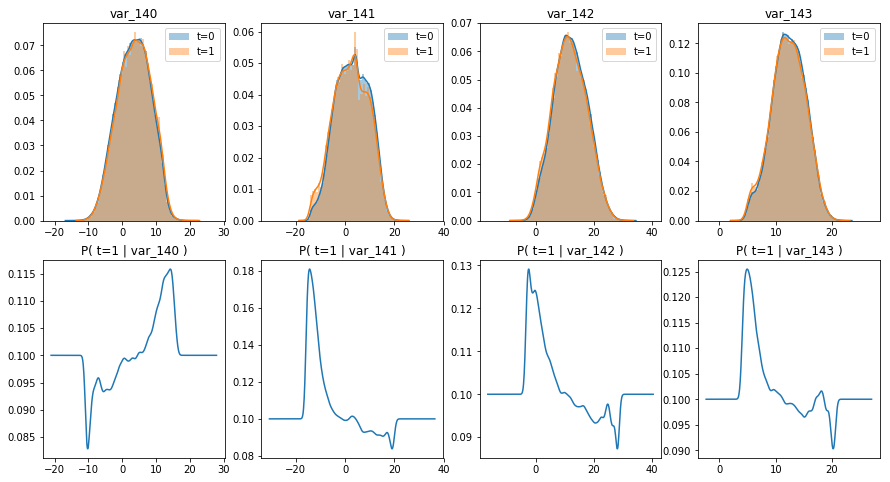

Showing vars 144 to 151 ...


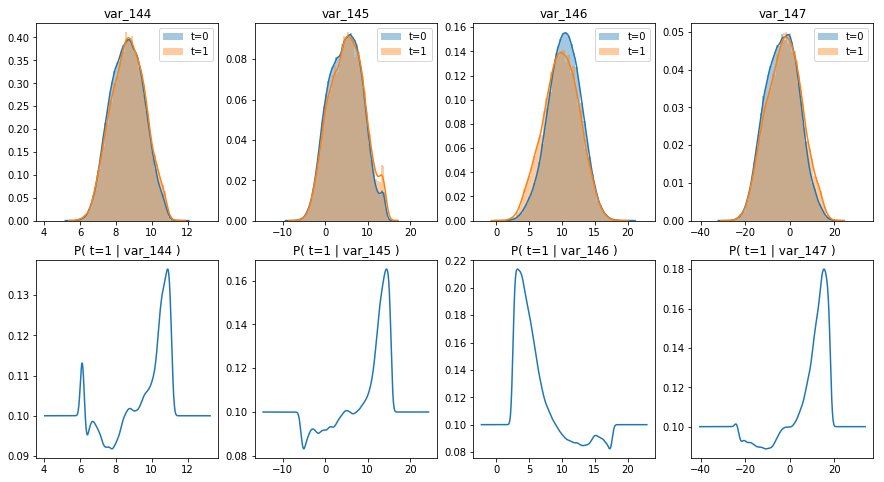

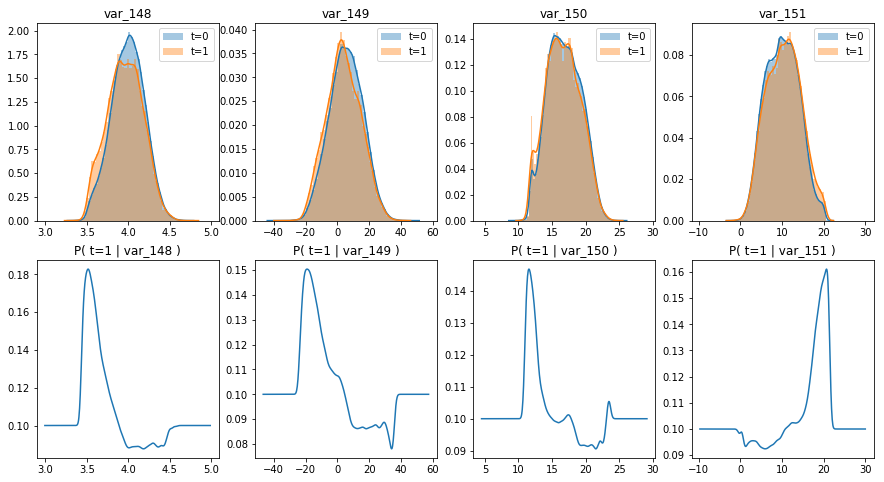

Showing vars 152 to 159 ...


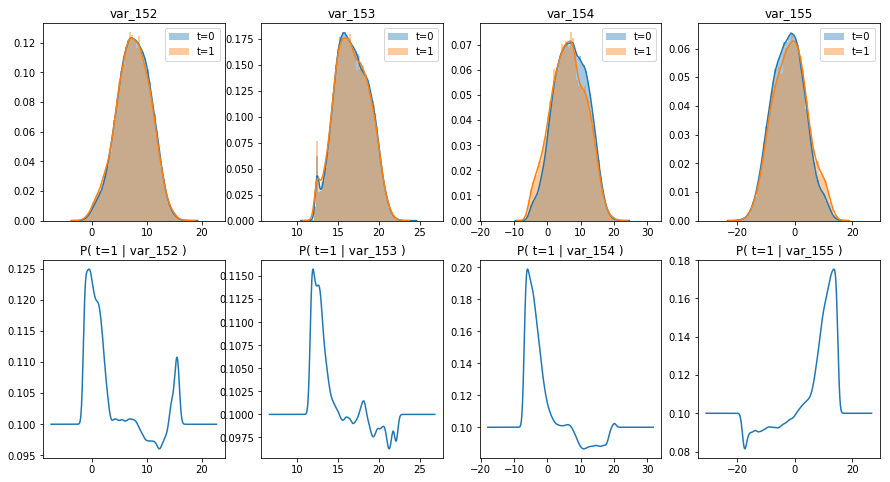

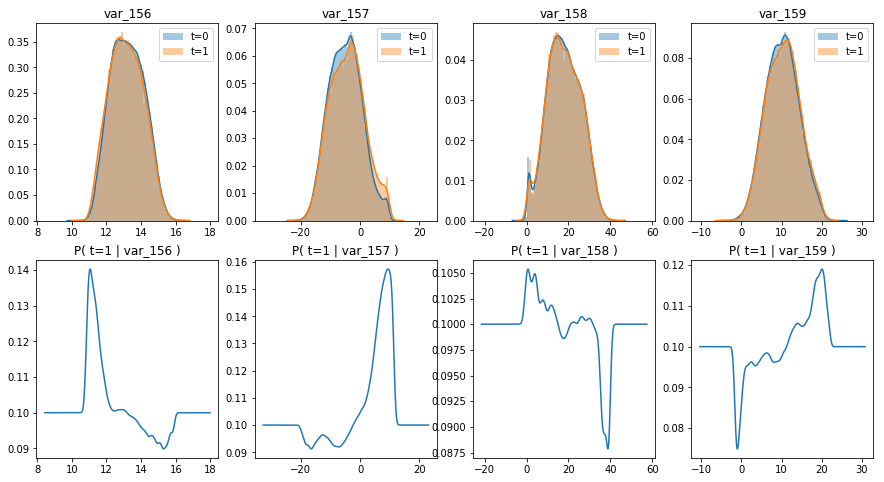

Showing vars 160 to 167 ...


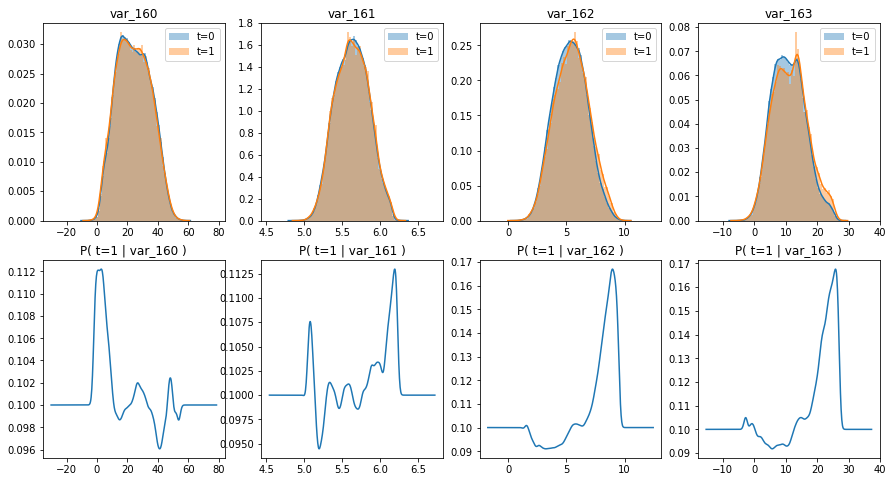

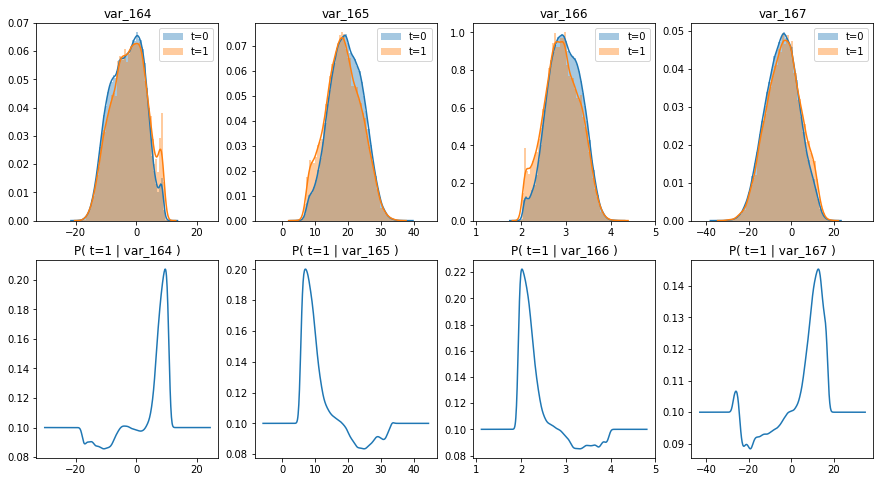

Showing vars 168 to 175 ...


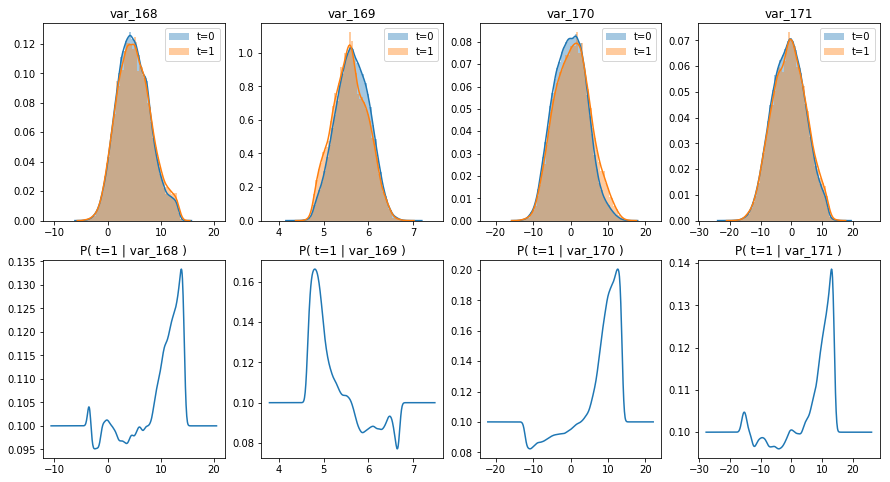

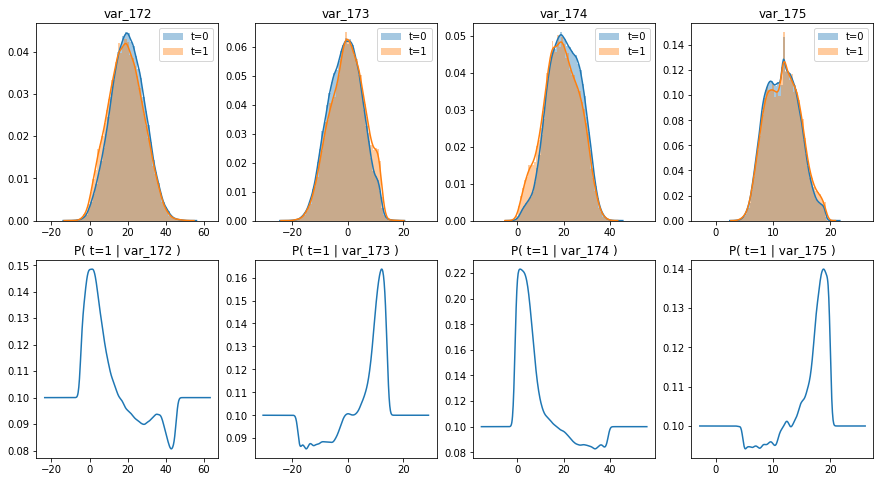

Showing vars 176 to 183 ...


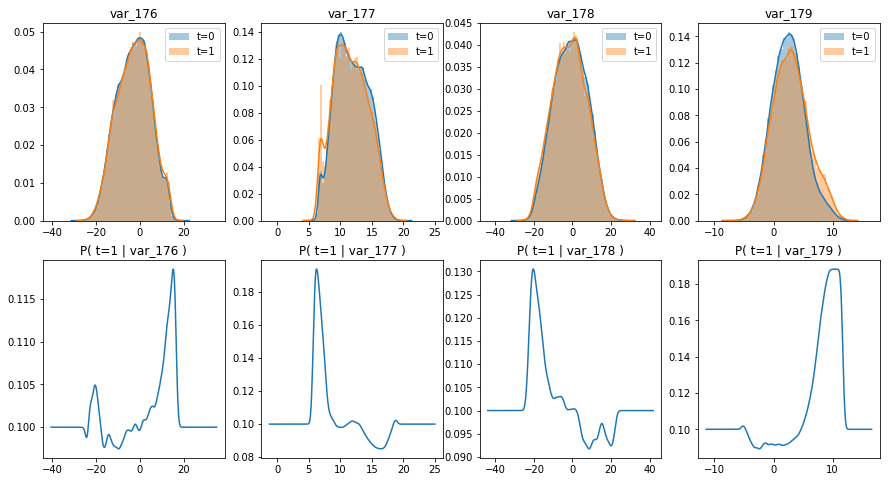

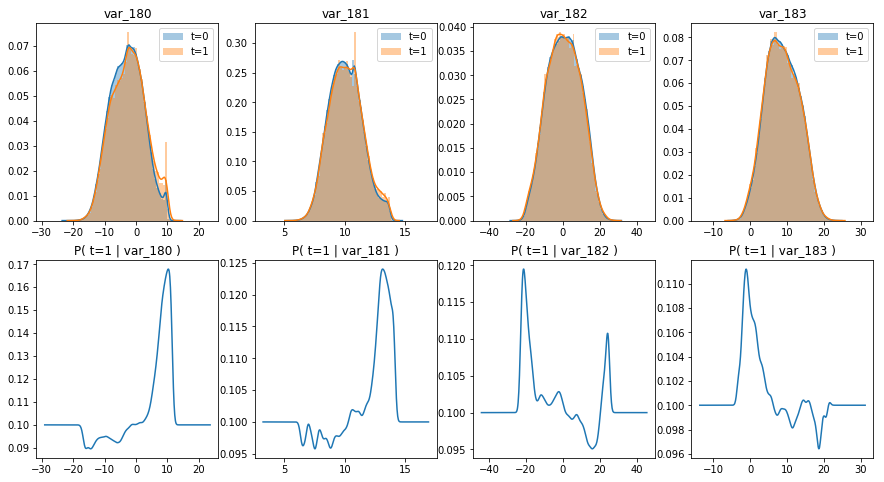

Showing vars 184 to 191 ...


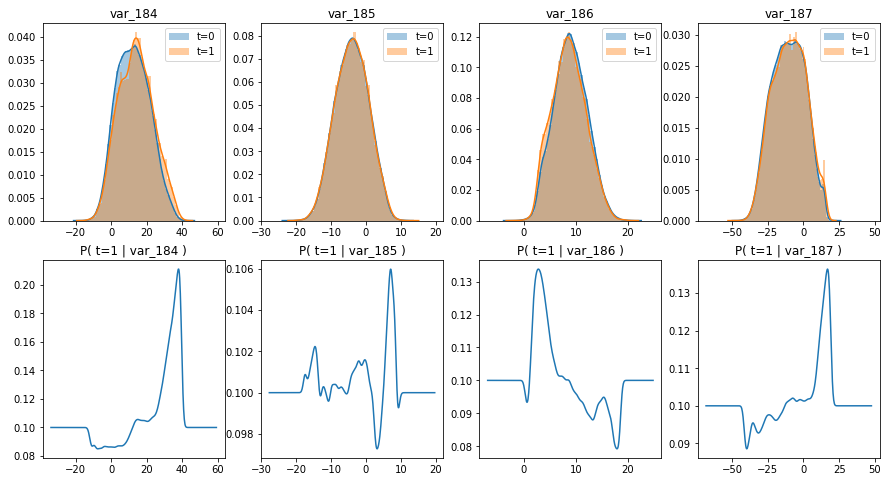

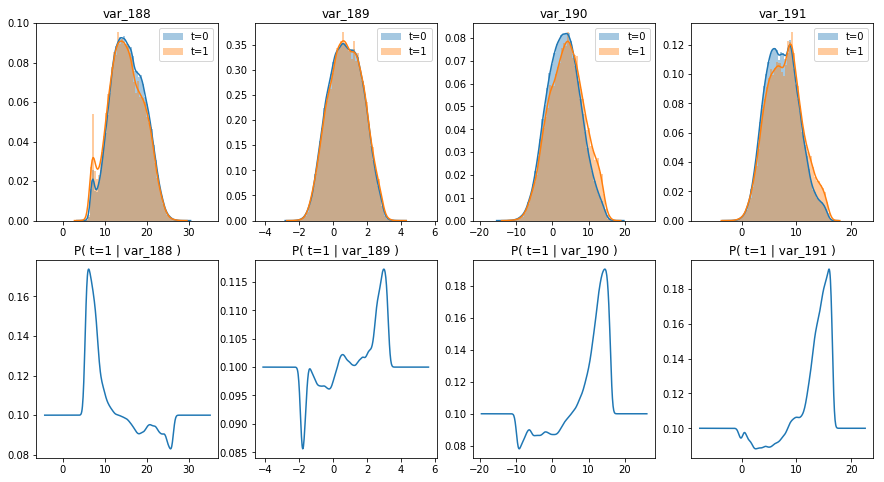

Showing vars 192 to 199 ...


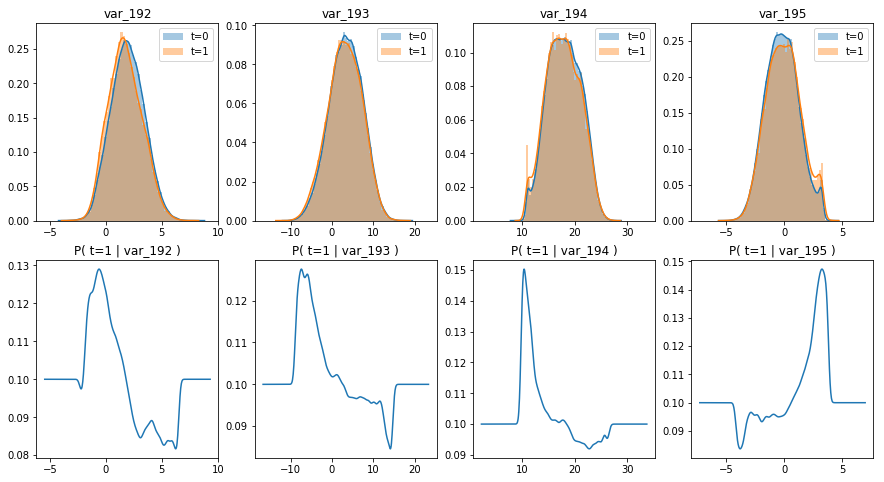

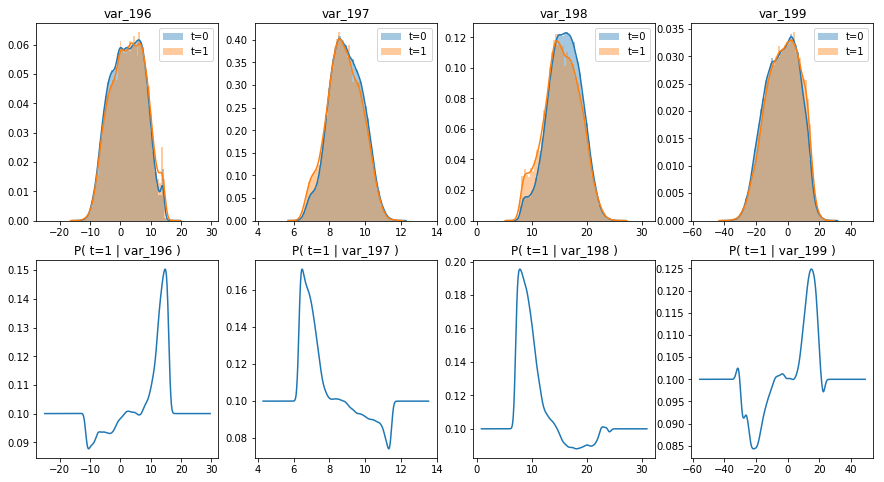

In [37]:
# DRAW PLOTS, YES OR NO
Picture = True
# DATA HAS Z-SCORE RANGE OF -4.5 TO 4.5
rmin=-5; rmax=5; 
# CALCULATE PROBABILITIES FOR 501 BINS
res=501
# STORE PROBABILITIES IN PR
pr = 0.1 * np.ones((200,res))
pr2 = pr.copy()
xr = np.zeros((200,res))
xr2 = xr.copy()
ct2 = 0
for j in range(50):
    if Picture: plt.figure(figsize=(15,8))
    for v in range(4):
        ct = 0
        # CALCULATE PROBABILITY FUNCTION FOR VAR
        for i in np.linspace(rmin,rmax,res):
            pr[v+4*j,ct] = getp(v+4*j,m[v+4*j]+i*s[v+4*j])
            xr[v+4*j,ct] = m[v+4*j]+i*s[v+4*j]
            xr2[v+4*j,ct] = i
            ct += 1
        if Picture:
            # SMOOTH FUNCTION FOR PRETTIER DISPLAY
            # BUT USE UNSMOOTHED FUNCTION FOR PREDICTION
            pr2[v+4*j,:] = smooth(pr[v+4*j,:],res//10)
            # DISPLAY PROBABILITY FUNCTION
            plt.subplot(2, 4, ct2%4+5)
            plt.plot(xr[v+4*j,:],pr2[v+4*j,:],'-')
            plt.title('P( t=1 | var_'+str(v+4*j)+' )')
            xx = plt.xlim()
            # DISPLAY TARGET DENSITIES
            plt.subplot(2, 4, ct2%4+1)            
            sns.distplot(train0['var_'+str(v+4*j)], label = 't=0')
            sns.distplot(train1['var_'+str(v+4*j)], label = 't=1')
            plt.title('var_'+str(v+4*j))
            plt.legend()
            plt.xlim(xx)
            plt.xlabel('')
        if (ct2%8==0): print('Showing vars',ct2,'to',ct2+7,'...')
        ct2 += 1
    if Picture: plt.show()